# Chapter 02 Frequency Domain

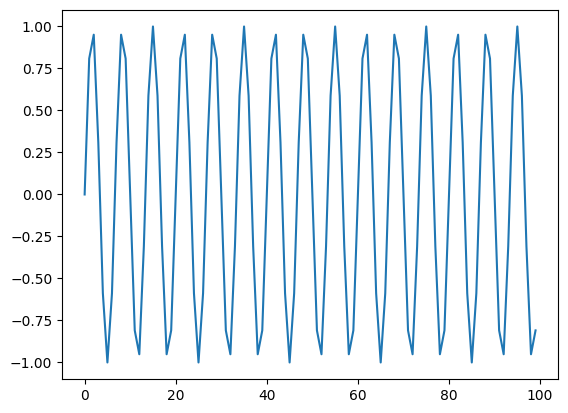

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(100)
s = np.sin(0.15*2*np.pi*t)
plt.plot(s)